## Marçenko-Pastur law

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

def marcenko_pastur(x, eta, lam1, lam2, sigma=1):
    if x > lam2 or x < lam1:
        return 0
    # if x < lam2 and x > lam1:
    return np.sqrt((lam2 - x) * (x - lam1)) / (eta * x * 2 * np.pi * sigma**2)
    


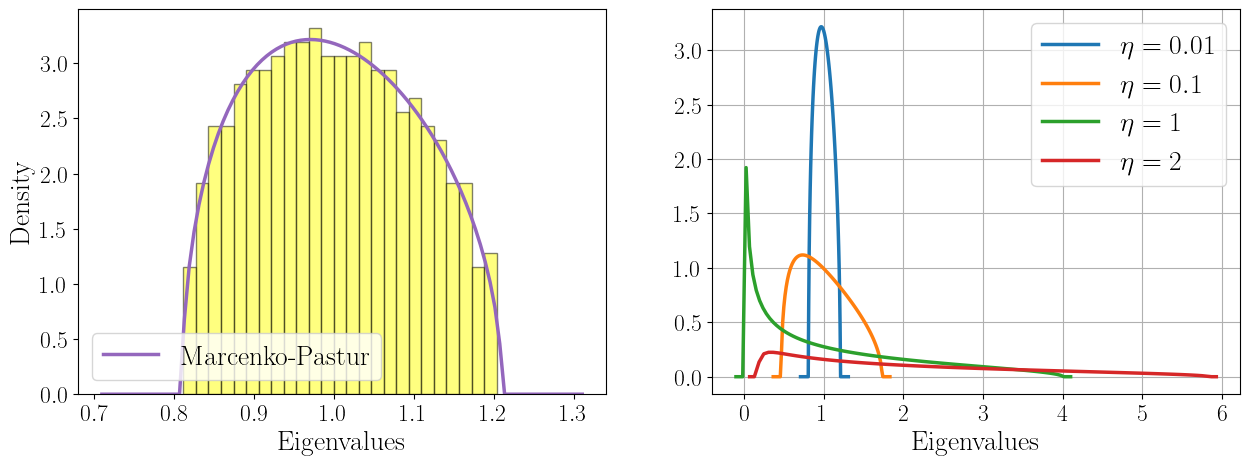

In [3]:
# Parameters
p = 500
n = 50000
X = np.random.randn(p, n)
eta = p / n 

# Covariance matrix
C = X @ X.T / n 

# edges
a = (1 - np.sqrt(eta))**2
b = (1 + np.sqrt(eta))**2
T = np.linspace(a - 0.1, b + 0.1, 100)

# eigenvalues
eigvals = np.linalg.eig(C)[0]

# Plotting
linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(eigvals, color = 'yellow', density = True, bins=25, alpha=.5, edgecolor = 'black' )
# Marcenko-pastur
res = []
for t in T:
    res.append(marcenko_pastur(t, eta, a, b))
ax[0].plot(T, res, color = 'tab:purple', linewidth = 2.5, label = 'Marcenko-Pastur')
ax[0].legend(fontsize = fontsize)
ax[0].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[0].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[0].set_ylabel('Density', fontsize = fontsize)
ax[0].set_xlabel('Eigenvalues', fontsize = fontsize)

# Second plot
etas = [0.01, 0.1, 1, 2]
for eta in etas:
    a = (1 - np.sqrt(eta))**2
    b = (1 + np.sqrt(eta))**2
    T = np.linspace(a - 0.1, b + 0.1, 100)
    res = []  
    for t in T:
        res.append(marcenko_pastur(t, eta, a, b))
    ax[1].plot(T, res, linewidth = 2.5, label = f'$ \eta = {eta}$')
    ax[1].legend(fontsize = fontsize)
    ax[1].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
    ax[1].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[1].legend(fontsize = fontsize)
ax[1].grid()
ax[1].set_xlabel('Eigenvalues', fontsize = fontsize)

path = './study-plot' + f'/marcenko-pastur-n-{n}-p-{p}.pdf'
fig.savefig(path, bbox_inches='tight')